<a href="https://colab.research.google.com/github/ProfRTRD/Proyecto-final/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$H=\frac{P_1^2}{2m_1}+\frac{P_2^2}{2m_2}+v_0(e^\frac{-q_1}{d}+e^\frac{q_2}{d}+e^\frac{-(q_2-q_1)}{d})$

> Bloc con sangría

> Bloc con sangría





In [ ]:
import numpy as np
#INTENTO 1
def simplectic_example(y, t):
    return np.array([y[1], -y[0]])

def ode_solver(f, y0, t, dt):
    # Initial conditions
    y = np.array(y0)

    # Apply Runge-Kutta method
    for i in range(1, len(t)):
        # Compute the increment
        y_next = y + dt * f(y, t[i-1])

        # Update the solution
        y = y_next

    return y

# Test the solver
y0 = np.array([1, 0])
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

solution = ode_solver(simplectic_example, y0, t, dt)

print(solution)

[-0.88232455  0.57164621]


In [ ]:
import numpy as np
#INTENTO 2

# Define the function F
def F(x, y):
    # Calculate dy/dt
    dy_dt = g(x, y)

    # Calculate dx/dt
    dx_dt = f(x, y)

    return dy_dt, dx_dt

# Define the function that will implement the RK4 method
def RK4(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0

    for i in range(steps):
        k1 = h * f(x[i], y[i])
        l1 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * l1)
        l2 = h * f(x[i] + h, y[i] + k2)

        x[i + 1] = x[i] + (k1 + 2 * l1 + 2 * k2 + l2) / 6
        y[i + 1] = y[i] + (k1 + 2 * l1 + 2 * k2 + l2) / 6

    return x, y

# Define the functions f and g
def f(x, y):
    return x - y

def g(x, y):
    return x + y

# Set the initial conditions
x0, y0 = 1, 1

# Set the time step and the number of steps
h, steps = 0.1, 100

# Call the RK4 function
x, y = RK4(F, x0, y0, h, steps)

# Print the results
print("x = ", x)
print("y = ", y)

TypeError: ignored

In [ ]:
import numpy as np
#INTENTO 3
def runge_kutta_simp_order5(f, y0, t):
    dt = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    # Coeficientes de Butcher para un método simpléctico de orden 5
    a = np.array([[0, 0, 0, 0, 0],
                  [1/5, 0, 0, 0, 0],
                  [3/40, 9/40, 0, 0, 0],
                  [3/10, -9/10, 6/5, 0, 0],
                  [-11/54, 5/2, -70/27, 35/27, 0]])
    b = np.array([1631/55296, 175/512, 575/13824, 44275/110592, 253/4096])

    for i in range(len(t) - 1):
        k = np.zeros((5, len(y0)))
        for j in range(5):
            k[j] = f(t[i] + a[j, j]*dt, y[i] + dt*np.sum(a[j, :j]*k[:j], axis=0))
        y[i+1] = y[i] + dt*np.sum(b[:, np.newaxis]*k, axis=0)
    return y


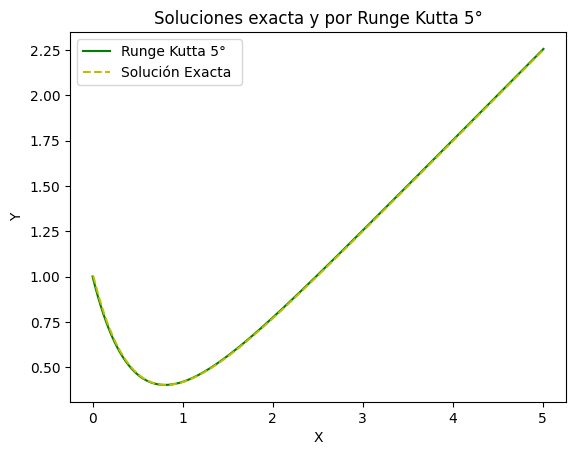

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def functi(x,y):
  return x - 2*y
h = 0.01
y = 1
x = 0
X = [x]
Y = [y]
Y_exact = [y]

def phi_functi(a,b,c,d,e):
  return (7*a + 32*b + 12*c + 32*d + 7*e)/90

while x <= 5:
  Y_exact.append((2*x+5*np.exp(-2*x)-1)/4)
  k_1 = functi(x,y)
  k_2 = functi(x + 1/4*h, y + 1/4*k_1*h)
  k_3 = functi(x + 1/4*h, y + 1/8*k_1*h + 1/8*k_2*h)
  k_4 = functi(x + 1/2*h, y - 1/2*k_2*h + k_3*h)
  k_5 = functi(x + 3/4*h, y + 3/16*k_1*h + 9/16*k_4*h)
  k_6 = functi(x + h, y - 3/7*k_1*h + 2/7*k_2*h + 12/7*k_3 * h - 12/7*k_4*h + 8/7*k_5*h)
  y += phi_functi(k_1,k_3,k_4,k_5,k_6) * h
  x += h
  X.append(x)
  Y.append(y)

plt.title("Soluciones exacta y por Runge Kutta 5°")
plt.plot(X,Y,'g',label='Runge Kutta 5°')
plt.plot(X,Y_exact,'y--',label='Solución Exacta ')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='upper left')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def phi(a,b,c,d,e):
  A = (7*a + 32*b + 12*c + 32*d + 7*e)/90
  return A

def f(t,p1,p2,q1,q2):
  return p2

def g(t,p1,p2,q1,q2):
  return p1

def l(t,p1,p2,q1,q2):
  return q1

def k(t,p1,p2,q1,q2):
  return q2

p1=1
p2=1
q1 = 1
q2 = 1
t=0
h=0.001
T = [t]
P1 = [p1]
P2 = [p2] #Guardara los valores para graficarlos
Q1 = [q1]
Q2 = [q2]

while t <= 5:
  k_1p1 = f(t,p1,p2,q1,q2)
  k_1p2 = g(t,p1,p2,q1,q2)
  k_1q1 = l(t,p1,p2,q1,q2)
  k_1q2 = k(t,p1,p2,q1,q2)

  k_2p1 = f(t + 0.25*h, p1 + 0.25*k_1p1*h , p2 + 0.25*k_1p1*h, q1+0.25*k_1p1*h, q2 + 0.25*k_1p1*h)
  k_2p2 = g(t + 0.25*h, p1 + 0.25*k_1p1*h , p2 + 0.25*k_1p1*h, q1+0.25*k_1p1*h, q2 + 0.25*k_1p1*h)
  k_2q1 = l(t + 0.25*h, p1 + 0.25*k_1p1*h , p2 + 0.25*k_1p1*h, q1+0.25*k_1p1*h, q2 + 0.25*k_1p1*h)
  k_2q2 = k(t + 0.25*h, p1 + 0.25*k_1p1*h , p2 + 0.25*k_1p1*h, q1+0.25*k_1p1*h, q2 + 0.25*k_1p1*h)

  k_3p1 = f(t + 0.25*h, p1 + 0.125*k_1p1*h + 0.125*k_2p1*h , p2 + 0.125*k_1p2*h + 0.125*k_2p2*h, q1 + 0.125*k_1q1*h + 0.125*k_2q1*h , q2 + 0.125*k_1q2*h + 0.125*k_2q2*h)
  k_3p2 = g(t + 0.25*h, p1 + 0.125*k_1p1*h + 0.125*k_2p1*h , p2 + 0.125*k_1p2*h + 0.125*k_2p2*h, q1 + 0.125*k_1q1*h + 0.125*k_2q1*h , q2 + 0.125*k_1q2*h + 0.125*k_2q2*h)
  k_3q1 = l(t + 0.25*h, p1 + 0.125*k_1p1*h + 0.125*k_2p1*h , p2 + 0.125*k_1p2*h + 0.125*k_2p2*h, q1 + 0.125*k_1q1*h + 0.125*k_2q1*h , q2 + 0.125*k_1q2*h + 0.125*k_2q2*h)
  k_3q2 = k(t + 0.25*h, p1 + 0.125*k_1p1*h + 0.125*k_2p1*h , p2 + 0.125*k_1p2*h + 0.125*k_2p2*h, q1 + 0.125*k_1q1*h + 0.125*k_2q1*h , q2 + 0.125*k_1q2*h + 0.125*k_2q2*h)

  k_4p1 = f(t + 0.5*h, p1 - 0.5*k_2p1*h + k_3p1*h , p2 - 0.5*k_2p2*h + k_3p2*h, q1 - 0.5*k_2q1*h + k_3q1*h , q2 - 0.5*k_2q2*h + k_3q2*h)
  k_4p2 = g(t + 0.5*h, p1 - 0.5*k_2p1*h + k_3p1*h , p2 - 0.5*k_2p2*h + k_3p2*h, q1 - 0.5*k_2q1*h + k_3q1*h , q2 - 0.5*k_2q2*h + k_3q2*h)
  k_4q1 = l(t + 0.5*h, p1 - 0.5*k_2p1*h + k_3p1*h , p2 - 0.5*k_2p2*h + k_3p2*h, q1 - 0.5*k_2q1*h + k_3q1*h , q2 - 0.5*k_2q2*h + k_3q2*h)
  k_4q2 = k(t + 0.5*h, p1 - 0.5*k_2p1*h + k_3p1*h , p2 - 0.5*k_2p2*h + k_3p2*h, q1 - 0.5*k_2q1*h + k_3q1*h , q2 - 0.5*k_2q2*h + k_3q2*h)

  k_5p1 = f(t + 0.75*h, p1 + (3/16)*k_1p1*h + (9/16)*k_4p1*h , p2 + (3/16)*k_1p2*h + (9/16)*k_4p2*h, q1 + (3/16)*k_1q1*h + (9/16)*k_4q1*h , q2 + (3/16)*k_1q2*h + (9/16)*k_4q2*h)
  k_5p2 = g(t + 0.75*h, p1 + (3/16)*k_1p1*h + (9/16)*k_4p1*h , p2 + (3/16)*k_1p2*h + (9/16)*k_4p2*h, q1 + (3/16)*k_1q1*h + (9/16)*k_4q1*h , q2 + (3/16)*k_1q2*h + (9/16)*k_4q2*h)
  k_5q1 = l(t + 0.75*h, p1 + (3/16)*k_1p1*h + (9/16)*k_4p1*h , p2 + (3/16)*k_1p2*h + (9/16)*k_4p2*h, q1 + (3/16)*k_1q1*h + (9/16)*k_4q1*h , q2 + (3/16)*k_1q2*h + (9/16)*k_4q2*h)
  k_5q2 = k(t + 0.75*h, p1 + (3/16)*k_1p1*h + (9/16)*k_4p1*h , p2 + (3/16)*k_1p2*h + (9/16)*k_4p2*h, q1 + (3/16)*k_1q1*h + (9/16)*k_4q1*h , q2 + (3/16)*k_1q2*h + (9/16)*k_4q2*h)

  k_6p1 = f(t + h, p1 - (3/7)*k_1p1*h + (2/7)*k_2p1*h + (12/7)*k_3p1 * h - (12/7)*k_4p1*h + (8/7)*k_5p1*h
           , p2 - (3/7)*k_1p2*h + (2/7)*k_2p2*h + (12/7)*k_3p2 * h - (12/7)*k_4p2*h + (8/7)*k_5p2*h
            , q1 - (3/7)*k_1q1*h + (2/7)*k_2q1*h + (12/7)*k_3q1 * h - (12/7)*k_4q1*h + (8/7)*k_5q1*h
            , q2 - (3/7)*k_1q1*h + (2/7)*k_2q2*h + (12/7)*k_3q2 * h - (12/7)*k_4q2*h + (8/7)*k_5q2*h)

  k_6p2 = g(t + h, p1 - (3/7)*k_1p1*h + (2/7)*k_2p1*h + (12/7)*k_3p1 * h - (12/7)*k_4p1*h + (8/7)*k_5p1*h
           , p2 - (3/7)*k_1p2*h + (2/7)*k_2p2*h + (12/7)*k_3p2 * h - (12/7)*k_4p2*h + (8/7)*k_5p2*h
            , q1 - (3/7)*k_1q1*h + (2/7)*k_2q1*h + (12/7)*k_3q1 * h - (12/7)*k_4q1*h + (8/7)*k_5q1*h
            , q2 - (3/7)*k_1q1*h + (2/7)*k_2q2*h + (12/7)*k_3q2 * h - (12/7)*k_4q2*h + (8/7)*k_5q2*h)

  k_6q1 = l(t + h, p1 - (3/7)*k_1p1*h + (2/7)*k_2p1*h + (12/7)*k_3p1 * h - (12/7)*k_4p1*h + (8/7)*k_5p1*h
           , p2 - (3/7)*k_1p2*h + (2/7)*k_2p2*h + (12/7)*k_3p2 * h - (12/7)*k_4p2*h + (8/7)*k_5p2*h
            , q1 - (3/7)*k_1q1*h + (2/7)*k_2q1*h + (12/7)*k_3q1 * h - (12/7)*k_4q1*h + (8/7)*k_5q1*h
            , q2 - (3/7)*k_1q1*h + (2/7)*k_2q2*h + (12/7)*k_3q2 * h - (12/7)*k_4q2*h + (8/7)*k_5q2*h)

  k_6q2 = k(t + h, p1 - (3/7)*k_1p1*h + (2/7)*k_2p1*h + (12/7)*k_3p1 * h - (12/7)*k_4p1*h + (8/7)*k_5p1*h
           , p2 - (3/7)*k_1p2*h + (2/7)*k_2p2*h + (12/7)*k_3p2 * h - (12/7)*k_4p2*h + (8/7)*k_5p2*h
            , q1 - (3/7)*k_1q1*h + (2/7)*k_2q1*h + (12/7)*k_3q1 * h - (12/7)*k_4q1*h + (8/7)*k_5q1*h
            , q2 - (3/7)*k_1q1*h + (2/7)*k_2q2*h + (12/7)*k_3q2 * h - (12/7)*k_4q2*h + (8/7)*k_5q2*h)

  p1 += phi(k_1p1,k_3p1,k_4p1,k_5p1,k_6p1) * h
  p2 += phi(k_1p2,k_3p2,k_4p2,k_5p2,k_6p2) * h
  q1 += phi(k_1q1,k_3q1,k_4q1,k_5q1,k_6q1) * h
  q2 += phi(k_1q2,k_3q2,k_4q2,k_5q2,k_6q2) * h
  t += h
  T.append(t)
  P1.append(p1)
  P2.append(p2)
  Q1.append(q1)
  Q2.append(q2)